In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
matplotlib.style.use('ggplot')

In [3]:
# reading the dataset using pandas as table
df = pd.read_table('/home/aman/tmp/opensignal.txt',index_col=0)

In [4]:
# cleaning the dataset and assinging names to the columns as per given terminology
del df['Unnamed: 6']
df.columns = ['DI','CH1','CH2','CH3','CH4']
df = df.reset_index(drop=True)

In [5]:
# observing first 10 samples in dataset
df[:10]

,DI,CH1,CH2,CH3,CH4
0,0,8557,38208,27881,32863
1,0,8552,38612,27828,32705
2,0,8550,38460,27828,32901
3,0,8553,38444,27951,32769
4,0,8549,38244,27836,32804
5,0,8550,38324,27892,32841
6,0,8552,38557,27866,32837
7,0,8551,38272,27906,32901
8,0,8551,38092,27833,32688
9,0,8551,38116,27854,32700


First we plot grap of cummulative sum of each variable i.e. 'DI','CH1','CH2','CH3','CH4' with coming input sequence. So we can infer from this plot that the value of new coming sequences for signals CH4, CH2 are almost same as their cummulative sum has almost same slope. Also, the cummulative sum of singal CH3 rises slowly as compared to CH2 & CH4 and in case of CH1 it's the slowest. Also since the slope of CH1 varies so cummulative sum is not increasing uniformily.

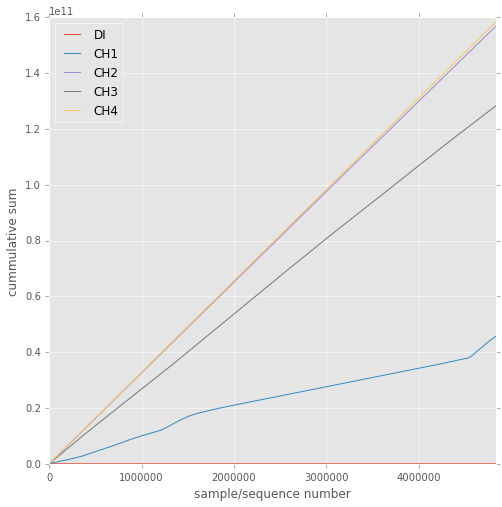

In [26]:
# showing the variatin of sum of  with each incoming sequence 
df1 = df.cumsum()
plt.figure(); 
ax = df1.plot(figsize=(8, 8));
ax.set(xlabel="sample/sequence number", ylabel="cummulative sum")

Now we are plotting the variation of signal values with each coming new sequence. Graph shows signals CH2 and CH4 are rythmic signals they follow a pattern of highs and lows which is steep from baseline in case of CH2.

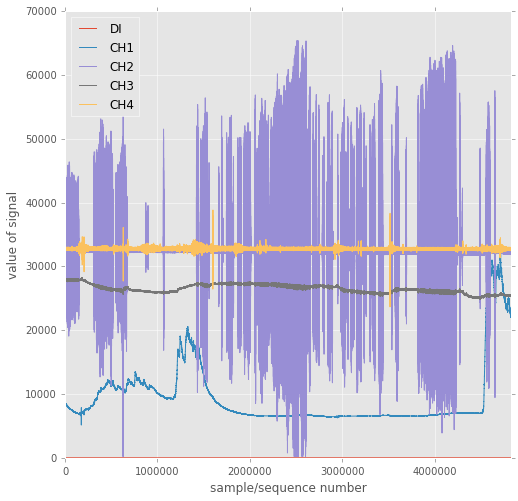

In [27]:
# showing the variatin of various channel values with each incoming sequence 
plt.figure(); 
ax = df.plot(figsize=(8, 8));
ax.set(xlabel="sample/sequence number", ylabel="value of signal")

In [9]:
ch1 = df[['CH1']]
ch2 = df[['CH2']]
ch3 = df[['CH3']]
ch4 = df[['CH4']]

Maximum values of signal CH1 lies in range of 5000-8000(approx.)

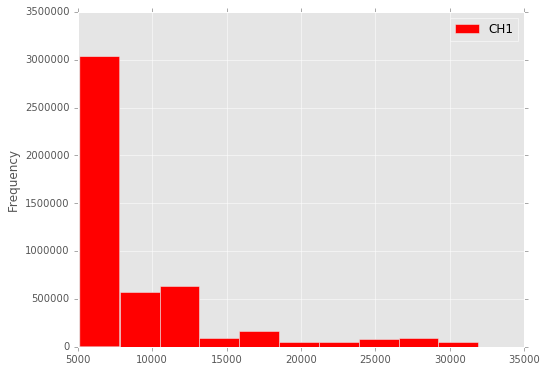

In [10]:
# plotting ch1 histogram 
plt.figure(); ch1.plot.hist(color='r', bins=10, figsize=(8, 6))

Maximum values of signal CH2 lies in range of 26000-32000(approx.)

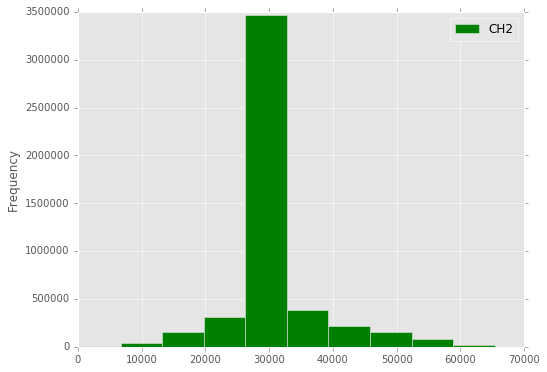

In [11]:
# plotting ch2 histogram 
plt.figure(); ch2.plot.hist(color='g', bins=10, figsize=(8, 6))

Maximum values of signal CH3 lies in around 26000(approx.). Also CH3 values are well distributed to other ranges also.

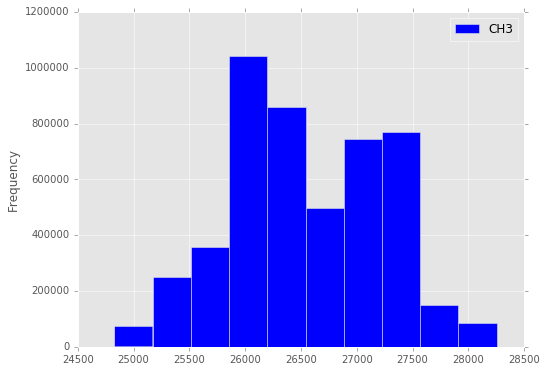

In [12]:
# plotting ch3 histogram 
plt.figure(); ch3.plot.hist(color='b', bins=10, figsize=(8, 6))

Maximum values of signal CH4 lies in range of 33000-34500(approx.). All values are concentrated between 31000-34500. So it's range of variation is lowest among all.

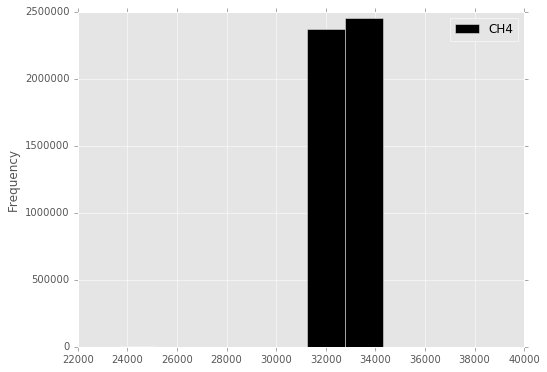

In [13]:
# plotting ch4 histogram 
plt.figure(); ch4.plot.hist(color='k', bins=10,figsize=(8, 6))

This combined histogram plot of all the signals help us understand the variation of all thes signals together. For example, all signals CH1-CH4 exist only in range 27000-32000(approx.), if we want to operate any device that needs all these values for functioning we shud set the input range to 27000-32000. Similarly more inferences can be drawn based on our application with the data.

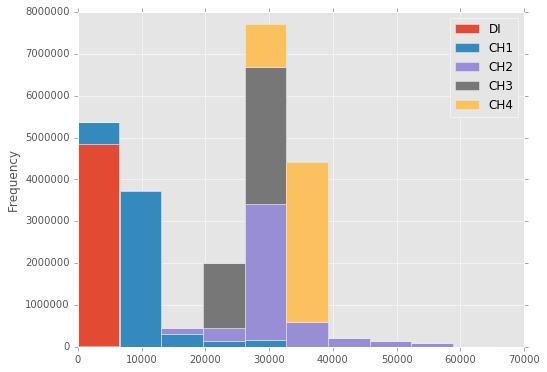

In [14]:
plt.figure();
df.plot.hist(stacked=True, bins=10, figsize=(8, 6))

In [15]:
#df.plot.scatter(x='CH1', y='CH2',s=50, figsize=(8, 6));

Lag plot is generally used to study randomness in the data points. Random data should not exhibit any structure in the lag plot. As it can be inferred from the lag plots of each signal, the values of CH4 has high degree of randomness followed by CH3. CH1 and CH2 has almost little or no randomness as they plot a straight line sructure.

In [16]:
from pandas.tools.plotting import lag_plot

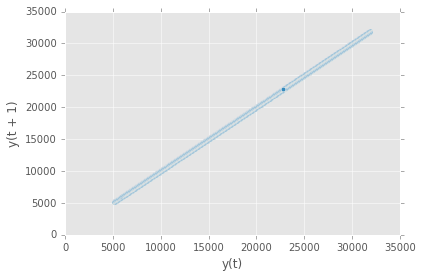

In [17]:
plt.figure()
lag_plot(ch1)

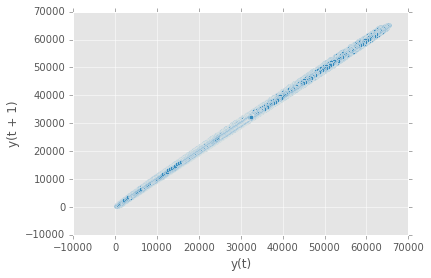

In [18]:
plt.figure()
lag_plot(ch2)

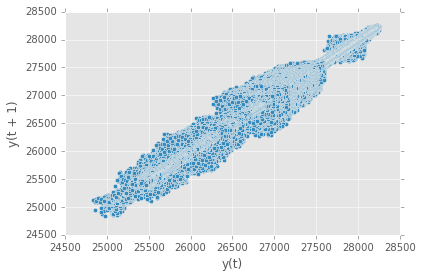

In [19]:
plt.figure()
lag_plot(ch3)

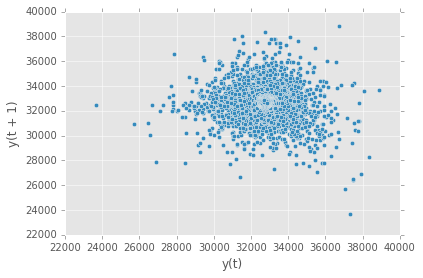

In [20]:
plt.figure()
lag_plot(ch4)

Scatter plot is shown to study the relations bwetween each signal with the other one. Plots in diagonal are basically density plot for that particular signal. In case of signal CH3 the values are distributed among total sequences and aren't concentrated like in case of other signals. Furhermore, the realtion between any two pair of siganls show that some relationships are simple that can be represented mathematically for example: CH4 and CH2. Other relationship are complicated which is difficult to represent in a mathematical form for example: CH3 and CH1 

In [21]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea403ebd50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fea4b287690>]], dtype=object)

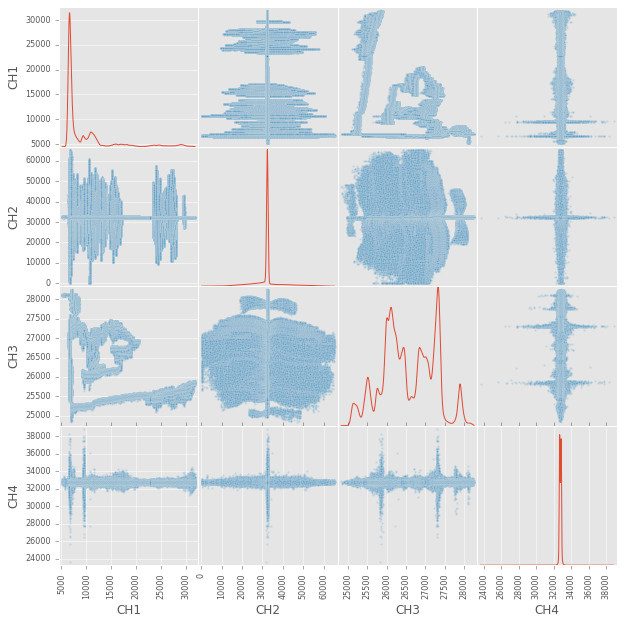

In [22]:
scatter_matrix(df[['CH1','CH2','CH3','CH4']], alpha=0.2, figsize=(10, 10), diagonal='kde')

Area is plotted to study trends in the data points of each signal with each incoming new sequence/sample.

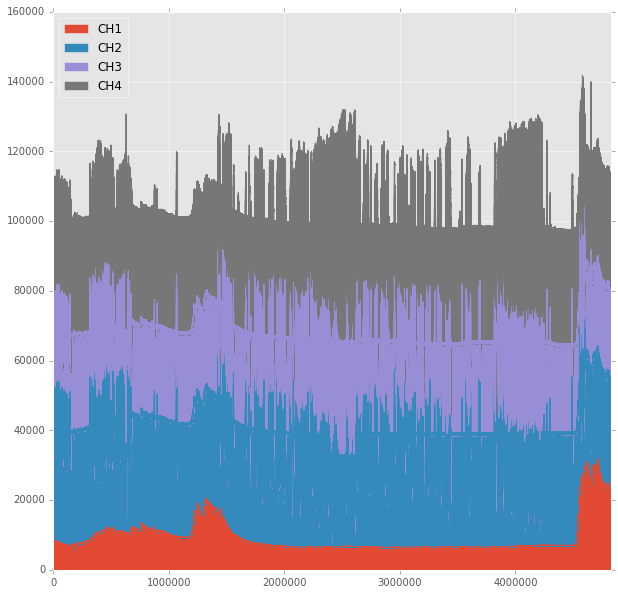

In [23]:
df[['CH1','CH2','CH3','CH4']].plot.area(figsize=(10, 10))